In [2]:
import pandas as pd
import seaborn as sns 
import numpy as np
import matplotlib.pyplot as plt

In [3]:
events = pd.read_csv("data/events.csv", dtype = {"event_id": np.int16, "application_id": np.int16})


/home/jorge/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (12,18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
events.memory_usage(deep=True).sum()

986807484

In [5]:
events['date']=pd.to_datetime(events['date'])
del events['event_uuid']
events['wifi']=events['wifi'].astype('bool')
events['connection_type']=events['connection_type'].astype('category')
del events['trans_id']

In [6]:
events.memory_usage(deep=True).sum()

316792078

In [26]:
events.head()

,date,event_id,ref_type,ref_hash,application_id,attributed,device_countrycode,device_os_version,device_brand,device_model,...,wifi,connection_type,ip_address,device_language,año,mes,día,hora,minuto,diaSemana
0,2019-03-05 00:09:36.966,0,1891515180541284343,2688759737656491380,38,False,6333597102633388268,5.908703e+17,NaN,5.990117e+18,...,True,Cable/DSL,7858558567428669000,4.077062e+17,2019,3,5,0,9,Tuesday
1,2019-03-05 00:09:38.920,1,1891515180541284343,2688759737656491380,38,False,6333597102633388268,5.908703e+17,NaN,5.990117e+18,...,True,Cable/DSL,7858558567428669000,4.077062e+17,2019,3,5,0,9,Tuesday
2,2019-03-05 00:09:26.195,0,1891515180541284343,2688759737656491380,38,False,6333597102633388268,5.908703e+17,NaN,5.990117e+18,...,True,Cable/DSL,7858558567428669000,4.077062e+17,2019,3,5,0,9,Tuesday
3,2019-03-05 00:09:31.107,2,1891515180541284343,2688759737656491380,38,False,6333597102633388268,5.908703e+17,NaN,5.990117e+18,...,True,Cable/DSL,6324037615828123965,4.077062e+17,2019,3,5,0,9,Tuesday
4,2019-03-09 21:00:36.585,3,1891515180541284343,2635154697734164782,38,False,6333597102633388268,7.391844e+18,NaN,5.960896e+18,...,True,Cable/DSL,2894495631302821483,3.301378e+18,2019,3,9,21,0,Saturday


In [27]:
events['date'].describe()

count                        2494423
unique                       2488829
top       2019-03-12 14:36:58.017000
freq                               3
first     2019-03-05 00:00:00.255000
last      2019-03-13 23:59:59.984000
Name: date, dtype: object

In [28]:
events['event_id'].describe()

count    2.494423e+06
mean     9.970445e+01
std      1.070903e+02
min      0.000000e+00
25%      2.200000e+01
50%      3.100000e+01
75%      1.610000e+02
max      7.120000e+02
Name: event_id, dtype: float64

/home/jorge/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/jorge/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/jorge/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/home/jorge/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/home/jorge/anaconda3/lib

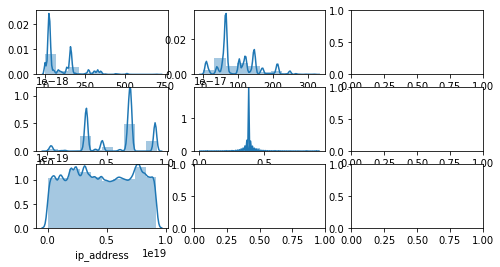

In [29]:
f, ax = plt.subplots(3,3,figsize=(8,4))
vis1 = sns.distplot(events["event_id"],bins=10, ax= ax[0][0])
vis2 = sns.distplot(events["application_id"],bins=10, ax=ax[0][1])
vis3 = sns.distplot(events["device_language"],bins=10, ax=ax[1][0])
vis4 = sns.distplot(events["device_city"],bins=10, ax=ax[1][1])
vis5 = sns.distplot(events["ip_address"],bins=10, ax=ax[2][0])

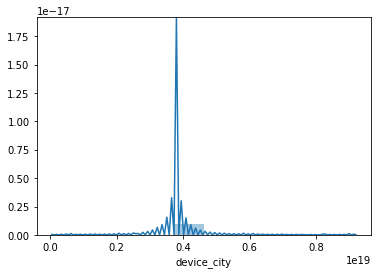

In [30]:
sns.distplot(events["device_city"],bins=10)

In [31]:
grupo_event_id=events.groupby(['event_id','device_language'])['event_id'].count().sort_values(ascending=False).rename("Cantidad").reset_index()
grupo_event_id['Total']=grupo_event_id['Cantidad'].sum()

grupo_event_id['%Total']=grupo_event_id['Cantidad']/grupo_event_id['Total']*100
grupo_event_id=grupo_event_id.head(10)
grupo_event_id.head()

,event_id,device_language,Cantidad,Total,%Total
0,22,6.977049e+18,386864,2406604,16.075100
1,31,6.804428e+18,283738,2406604,11.789975
2,161,3.301378e+18,210336,2406604,8.739951
3,22,9.028383e+18,186469,2406604,7.748221
4,1,3.301378e+18,134833,2406604,5.602625


In [32]:
grupo_event_id2=events.groupby(['event_id'])['event_id'].count().sort_values(ascending=False).rename("Cantidad").reset_index()

grupo_event_id2.head(10)


,event_id,Cantidad
0,22,618228
1,31,417070
2,161,217846
3,1,157812
4,138,100039
5,162,84898
6,329,56490
7,156,53332
8,33,48581
9,171,43942


In [33]:
grupo_event_idioma=events.groupby(['device_language'])['device_language'].count().sort_values(ascending=False).rename("Cantidad").reset_index()
top10_idiomas=grupo_event_idioma['device_language'].head(10)
grupo_event_idioma.head(5)

,device_language,Cantidad
0,6.977049e+18,745898
1,3.301378e+18,589865
2,9.028383e+18,388832
3,6.804428e+18,340624
4,4.621024e+18,150143


In [34]:
top10_id=grupo_event_id2['event_id'].head(10)
top10_id

0     22
1     31
2    161
3      1
4    138
5    162
6    329
7    156
8     33
9    171
Name: event_id, dtype: int64

In [35]:
grupo_event_id=events.groupby(['event_id','device_language'])['event_id'].count().sort_values(ascending=False).rename("Cantidad").reset_index()
grupo_event_id['Total']=grupo_event_id.groupby('event_id')['Cantidad'].transform('sum').sort_values(ascending=False)
grupo_event_id=grupo_event_id[grupo_event_id['event_id'].isin(top10_id)]
grupo_event_id=grupo_event_id[grupo_event_id['device_language'].isin(top10_idiomas)]
grupo_event_id=grupo_event_id.head(20)

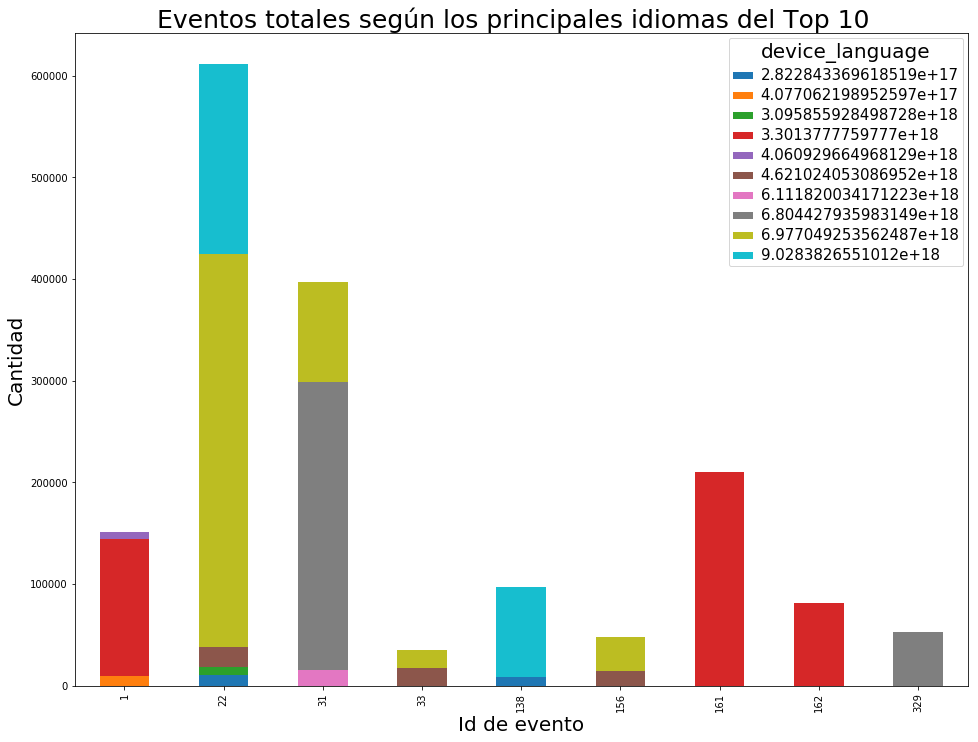

In [36]:
pivot_df =grupo_event_id.pivot(index='event_id', columns='device_language', values='Cantidad')
ax=pivot_df.plot.bar(stacked=True, figsize=(10,7))
figure = ax.get_figure()   
plt.setp(ax.get_legend().get_texts(), fontsize='15') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='20') # for legend title
ax.set_xlabel("Id de evento", fontsize = 20)
ax.figure.set_size_inches(16, 12)
ax.set_ylabel("Cantidad", fontsize = 20)
ax.set_title('Eventos totales según los principales idiomas del Top 10  ',fontsize = 25)
figure.savefig("Cantidad eventos según idioma.png")

In [16]:
top10_id

0     22
1     31
2    161
3      1
4    138
5    162
6    329
7    156
8     33
9    171
Name: event_id, dtype: int64

In [17]:
grupo_event_id_os=events.groupby(['event_id','device_os'])['device_os'].count().sort_values(ascending=False).rename("Cantidad").reset_index()

#grupo_event_id_os['Total']=grupo_event_id.groupby('event_id')['Cantidad'].transform('sum').sort_values(ascending=False)
grupo_event_id_os=grupo_event_id_os[grupo_event_id_os['event_id'].isin(top10_id)]
grupo_event_id_os.head(100)
#grupo_event_id_os[grupo_event_id_os['event_id'].isin(top10_id)]

,event_id,device_os,Cantidad
0,161,7.531669e+18,168199
1,1,7.531669e+18,82017
2,1,6.941825e+18,69488
3,161,6.941825e+18,49647
4,162,6.941825e+18,45053
5,162,7.531669e+18,39845
12,33,6.941825e+18,6148
25,33,7.531669e+18,2541


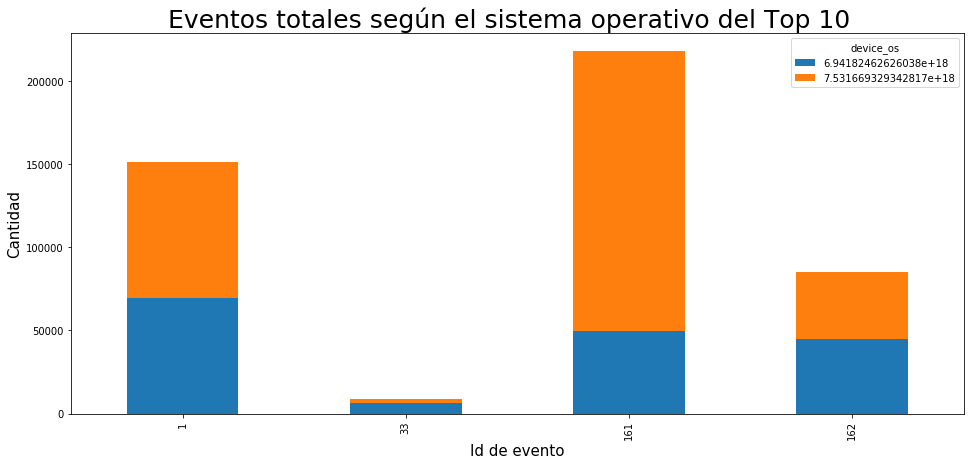

In [18]:
pivot_df =grupo_event_id_os.pivot(index='event_id', columns='device_os', values='Cantidad')
ax=pivot_df.plot.bar(stacked=True, figsize=(10,7))
figure = ax.get_figure()   
ax.set_xlabel("Id de evento", fontsize = 15)
ax.figure.set_size_inches(16, 7)
ax.set_ylabel("Cantidad", fontsize = 15)
ax.set_title('Eventos totales según el sistema operativo del Top 10  ',fontsize = 25)
figure.savefig("Cantidad eventos según so.png")

In [9]:
events['año'] = pd.DatetimeIndex(events['date']).year.astype('category')
events['mes'] =events['date'].dt.month.astype('category')
events['día'] = events['date'].dt.day.astype('category')
events['hora'] = events['date'].dt.hour.astype('int8')
events['minuto'] = events['date'].dt.minute.astype('category')
events['diaSemana'] = events['date'].dt.weekday_name.astype('category')
events.head()


,date,event_id,ref_type,ref_hash,application_id,attributed,device_countrycode,device_os_version,device_brand,device_model,...,wifi,connection_type,ip_address,device_language,año,mes,día,hora,minuto,diaSemana
0,2019-03-05 00:09:36.966,0,1891515180541284343,2688759737656491380,38,False,6333597102633388268,5.908703e+17,NaN,5.990117e+18,...,True,Cable/DSL,7858558567428669000,4.077062e+17,2019,3,5,0,9,Tuesday
1,2019-03-05 00:09:38.920,1,1891515180541284343,2688759737656491380,38,False,6333597102633388268,5.908703e+17,NaN,5.990117e+18,...,True,Cable/DSL,7858558567428669000,4.077062e+17,2019,3,5,0,9,Tuesday
2,2019-03-05 00:09:26.195,0,1891515180541284343,2688759737656491380,38,False,6333597102633388268,5.908703e+17,NaN,5.990117e+18,...,True,Cable/DSL,7858558567428669000,4.077062e+17,2019,3,5,0,9,Tuesday
3,2019-03-05 00:09:31.107,2,1891515180541284343,2688759737656491380,38,False,6333597102633388268,5.908703e+17,NaN,5.990117e+18,...,True,Cable/DSL,6324037615828123965,4.077062e+17,2019,3,5,0,9,Tuesday
4,2019-03-09 21:00:36.585,3,1891515180541284343,2635154697734164782,38,False,6333597102633388268,7.391844e+18,NaN,5.960896e+18,...,True,Cable/DSL,2894495631302821483,3.301378e+18,2019,3,9,21,0,Saturday


In [10]:
#funcion que recibe como argumento un dia en ingles y lodevuelve el dia en español
def diaEspañol(dia):
    if (dia=="Monday"): return "Lunes"
    if (dia=="Tuesday"): return "Martes"
    if (dia=="Wednesday"): return "Miercoles"
    if (dia=="Thursday"): return "Jueves"
    if (dia=="Friday"): return "Viernes"
    if (dia=="Saturday"): return "Sabado"
    if (dia=="Sunday"): return "Domingo"
    else: return dia

In [21]:
grupo_events_por_hora=events.groupby(['event_id','diaSemana','hora'])['event_id'].count().sort_values(ascending=False).rename("Cantidad Eventos").reset_index()
grupo_events_por_hora=grupo_events_por_hora.head(400) 
grupo_events_por_hora['diaSemana']=grupo_events_por_hora['diaSemana'].apply(diaEspañol)
grupo_events_por_hora.head()

,event_id,diaSemana,hora,Cantidad Eventos
0,22,Martes,0,10032
1,22,Miercoles,23,9406
2,22,Martes,23,9194
3,22,Miercoles,0,9057
4,22,Martes,22,8927


In [22]:
grupo_events_por_hora2=events.groupby(['event_id','hora'])['event_id'].count().sort_values(ascending=False).rename("Cantidad Eventos").reset_index()
#grupo_events_por_hora2=grupo_events_por_hora2.head(200) 
grupo_events_por_hora2=grupo_events_por_hora2[grupo_events_por_hora2['event_id'].isin(top10_id)]
grupo_events_por_hora2['event_id'].unique()
#grupo_events_por_hora2 = grupo_events_por_hora2[(grupo_events_por_hora2['event_id']!=22) & (grupo_events_por_hora2['event_id']!=31 )]

array([ 22,  31, 161,   1, 162, 138, 156, 171, 329,  33])

In [23]:
top10_id

0     22
1     31
2    161
3      1
4    138
5    162
6    329
7    156
8     33
9    171
Name: event_id, dtype: int64

/home/jorge/anaconda3/lib/python3.7/site-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


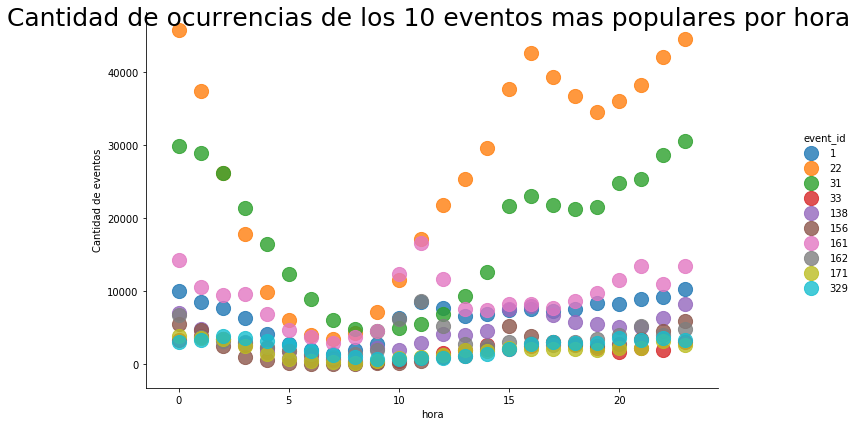

In [31]:
ax= sns.lmplot(data = grupo_events_por_hora2, x = "hora", y ="Cantidad Eventos",fit_reg=False, hue = "event_id",size = 6, aspect=1.5, scatter_kws = {'s':200}, )
fig = ax.fig 
ax.set(xlabel='hora', ylabel='Cantidad de eventos')
# Add a title to the Figure
fig.suptitle("Cantidad de ocurrencias de los 10 eventos mas populares por hora", fontsize=25)
fig.savefig("Cantidad eventos por hora.png")

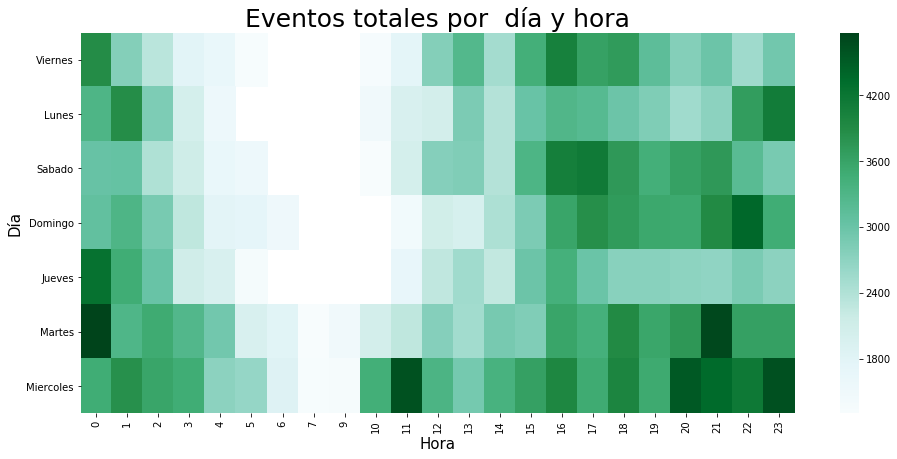

In [97]:
df2 = grupo_events_por_hora[['diaSemana', 'hora','Cantidad Eventos']]
heatmap2_data = pd.pivot_table(df2,values='Cantidad Eventos', index=['diaSemana'], columns={'hora'})
heatmap2_data.head(n=5)
ax=sns.heatmap(heatmap2_data, cmap="BuGn")
ax.set_title('Eventos totales por  día y hora',fontsize = 25)
ax.set_xlabel("Hora", fontsize = 15)
ax.set_ylabel("Día", fontsize = 15)
ax.figure.set_size_inches(16, 7)
figure = ax.get_figure()   
figure.savefig("Eventos_por_dia_hora.png")

In [2]:
events.info()

NameError: name 'events' is not defined

In [1]:
events['attributed'].describe()

NameError: name 'events' is not defined

In [73]:
grupo_events_por_dia=events.groupby(['event_id','diaSemana'])['diaSemana'].count().sort_values(ascending=False).rename("Totalevents").reset_index()
grupo_events_por_dia.head()  

,event_id,diaSemana,Totalevents
0,22,Tuesday,130422
1,22,Wednesday,129990
2,31,Wednesday,98745
3,31,Tuesday,87741
4,22,Saturday,77156


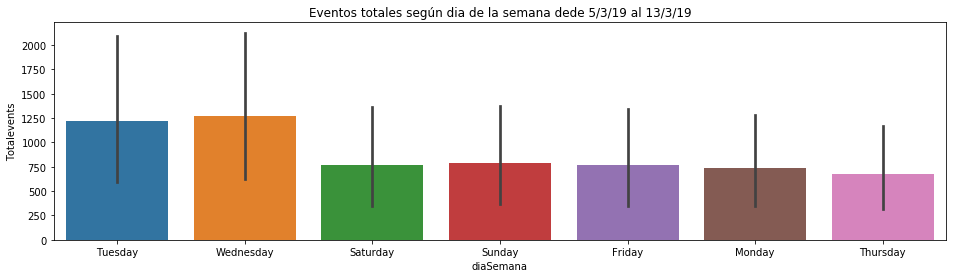

In [74]:
ax = sns.barplot(x='diaSemana', y='Totalevents', data=grupo_events_por_dia)
ax.set_title('Eventos totales según dia de la semana dede 5/3/19 al 13/3/19')
ax.figure.set_size_inches(16, 4)

In [35]:
grupo_events_por_dia=events.groupby(['event_id','diaSemana'])['diaSemana'].count().sort_values(ascending=False).rename("Totalevents").reset_index()
grupo_events_por_dia=grupo_events_por_dia.head(50) 

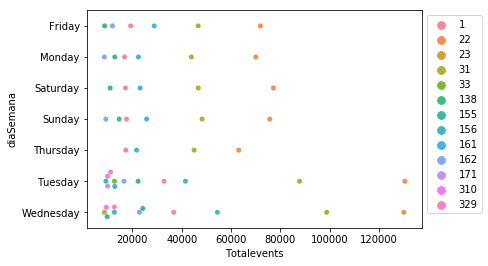

In [36]:
vis9 = sns.swarmplot(x="Totalevents", y="diaSemana", hue="event_id", data=grupo_events_por_dia)
vis9.legend_.remove()
plt.legend(loc="upper left", bbox_to_anchor=(1,1))
plt.show()

In [37]:
grupo_events_por_dia['diaSemana']=grupo_events_por_dia['diaSemana'].apply(diaEspañol)

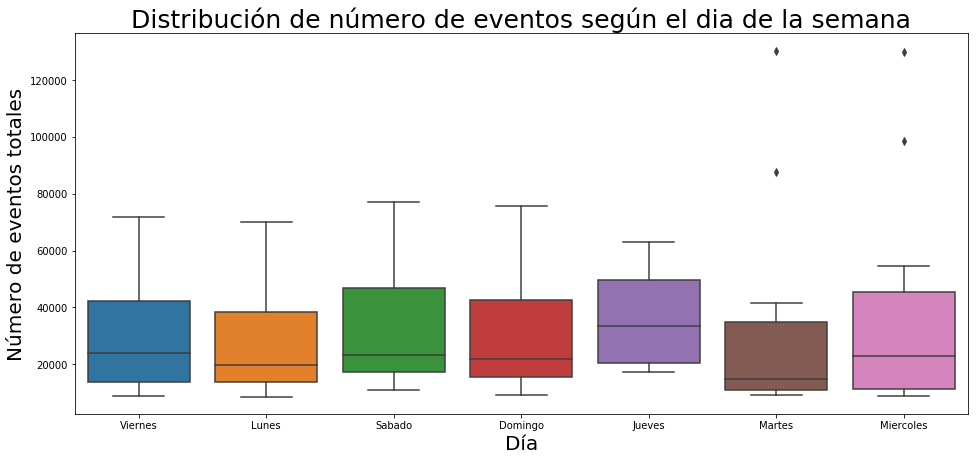

In [41]:
ax= sns.boxplot(data = grupo_events_por_dia, y = "Totalevents", x = "diaSemana")
fig = ax.get_figure()
ax.set_title('Distribución de número de eventos según el dia de la semana',fontsize = 25)
ax.set_xlabel("Día", fontsize = 20)
ax.set_ylabel("Número de eventos totales", fontsize = 20)
ax.figure.set_size_inches(16, 7)
figure = ax.get_figure()   
figure.savefig("Eventos_por_dia_boxplot.png")

#fig.savefig("fig1.png")

In [13]:
topEvents = events.loc[(events['event_id'] == 22) |\
                       (events['event_id'] == 31) |\
                       (events['event_id'] == 161) ][['event_id','hora']]
topEvents['count'] = 0
countEventByHour = topEvents.groupby(['event_id','hora']).count().reset_index()
countEventByHour.head()

,event_id,hora,count
0,22,0,45684
1,22,1,37354
2,22,2,26154
3,22,3,17811
4,22,4,9811


In [14]:
topEventsPivoted = topEvents.pivot_table(index = 'hora', columns = 'event_id', values = 'count', aggfunc = 'count')
topEventsPivoted.head()

event_id,22,31,161
hora,,,
0,45684,29915,14282
1,37354,28938,10594
2,26154,26101,9490
3,17811,21353,9631
4,9811,16402,6838


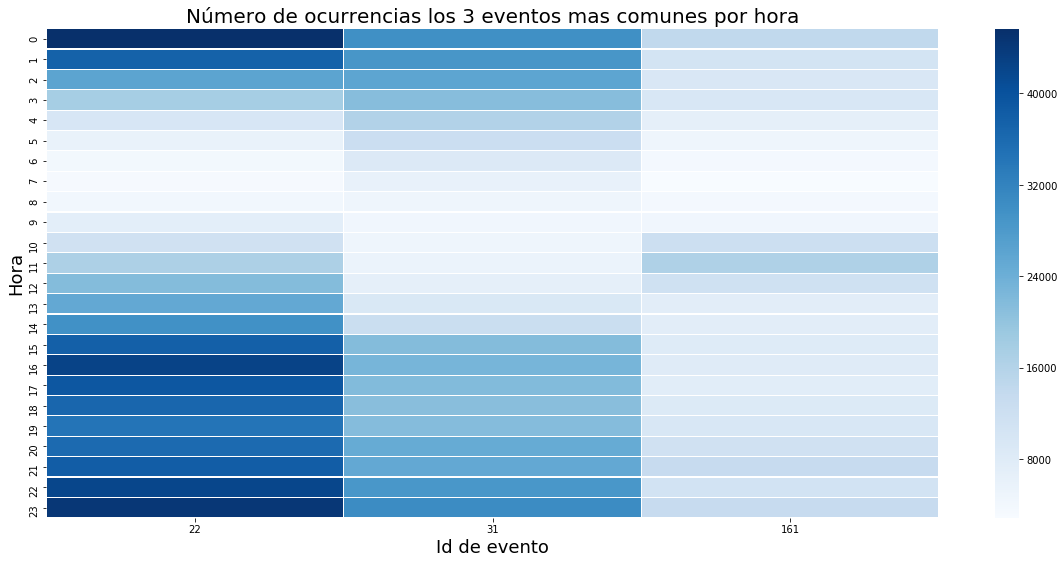

In [19]:
plt.figure(figsize = (20,9))
topEventsPivotedGraph = sns.heatmap(data = topEventsPivoted, cmap = "Blues", linewidths = 0.2)
topEventsPivotedGraph.set_title("Número de ocurrencias los 3 eventos mas comunes por hora", fontsize = 20)
topEventsPivotedGraph.set_ylabel("Hora", fontsize = 18)
topEventsPivotedGraph.set_xlabel("Id de evento", fontsize = 18)
fig = topEventsPivotedGraph.get_figure()
 
fig.savefig("Eventos mas comunes por hora.png")

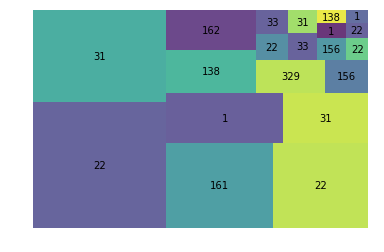

In [37]:
import matplotlib
import squarify
squarify.plot(sizes=grupo_event_id['Cantidad'],label=grupo_event_id['event_id'], alpha=.8 )
plt.axis('off')
plt.show()
